In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date, time
import pandas as pd
import os 
from PIL import Image
import matplotlib.pyplot as plt

In [74]:
path = os.getcwd()[:-6]

sorin = pd.read_csv(f'{path}Sorin/Data/frequencies/frequencies_25px_20240313.csv')
bodenmiller = pd.read_csv(f'{path}Bodenmiller/Data/frequencies/freqs_86_A_25px_20240229.csv')
crick = pd.read_csv(f'{path}Crick/Data/frequencies/freqs_MOC1_MOCAF_25px_20240307.csv')
dfs = [sorin, bodenmiller, crick]
dfs_names = ['sorin', 'bodenmiller', 'crick']

In [75]:
sorin_cd = pd.read_csv(f'{path}Sorin/Data/celldata/celldata_20240313.csv')
sorin_dists = pd.read_csv(f'{path}Sorin/Data/distances/dists_cellpairs_25px_20240313.csv')

sorin_cd

,cellID,class,Patient_ID,Location_Center_X,Location_Center_Y
0,D001_0,Cancer,LUAD_D001,93,159
1,D001_1,Tc,LUAD_D001,74,186
2,D001_2,Tc,LUAD_D001,167,131
3,D001_3,Cancer,LUAD_D001,134,116
4,D001_4,Endothelial cell,LUAD_D001,142,122
...,...,...,...,...,...
1640312,D416_2881,Cl MAC,LUAD_D416,281,879
1640313,D416_2882,Unknown,LUAD_D416,385,907
1640314,D416_2883,Cancer,LUAD_D416,363,992
1640315,D416_2884,Cancer,LUAD_D416,357,994


In [82]:
sorin_cd['cellID'].unique()

array(['D001_0', 'D001_1', 'D001_2', ..., 'D416_2883', 'D416_2884',
       'D416_2885'], dtype=object)

In [83]:
sorin

,Patient_ID,source_ID,source_cluster,Alt MAC,B cell,Cancer,Cl MAC,Cl Mo,DCs cell,Endothelial cell,Int Mo,Mast cell,NK cell,Neutrophils,Non-Cl Mo,T other,Tc,Th,Treg,Unknown
0,LUAD_D001,D001_0,Cancer,0.166667,0.0,0.166667,0.166667,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.166667,0.333333,0.000000,0.000000
1,LUAD_D001,D001_1,Tc,0.000000,0.0,0.285714,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.285714,0.000000,0.428571
2,LUAD_D001,D001_10,Th,0.000000,0.0,0.363636,0.272727,0.0,0.0,0.000000,0.0,0.090909,0.0,0.000000,0.0,0.000000,0.181818,0.090909,0.000000,0.000000
3,LUAD_D001,D001_100,Cancer,0.000000,0.0,0.714286,0.000000,0.0,0.0,0.142857,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.142857
4,LUAD_D001,D001_1000,Treg,0.000000,0.0,0.000000,0.083333,0.0,0.0,0.083333,0.0,0.000000,0.0,0.083333,0.0,0.083333,0.083333,0.250000,0.000000,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637717,LUAD_D416,D416_995,Unknown,0.000000,0.0,0.166667,0.500000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.166667,0.000000,0.166667
1637718,LUAD_D416,D416_996,Cl MAC,0.000000,0.0,0.400000,0.200000,0.0,0.0,0.000000,0.0,0.200000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.200000
1637719,LUAD_D416,D416_997,Cancer,0.000000,0.0,0.000000,0.333333,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.333333
1637720,LUAD_D416,D416_998,Cl MAC,0.000000,0.0,0.000000,0.333333,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.166667,0.333333,0.000000,0.166667


In [93]:
postids = sorin['source_ID'].unique()
preids = sorin_cd['cellID'].unique()

In [99]:
pat = 'LUAD_D002'

In [98]:
# Almost every patient loses cells
for pat in sorin['Patient_ID'].unique():
    pretemp = sorin_cd[sorin_cd['Patient_ID'] == pat]
    posttemp = sorin[sorin['Patient_ID'] == pat]
    if pretemp['cellID'].nunique() != posttemp['source_ID'].nunique():
        print(pat)

LUAD_D002
LUAD_D003
LUAD_D004
LUAD_D005
LUAD_D006
LUAD_D007
LUAD_D008
LUAD_D009
LUAD_D010
LUAD_D011
LUAD_D012
LUAD_D013
LUAD_D014
LUAD_D015
LUAD_D016
LUAD_D017
LUAD_D018
LUAD_D019
LUAD_D020
LUAD_D021
LUAD_D022
LUAD_D023
LUAD_D024
LUAD_D027
LUAD_D029
LUAD_D030
LUAD_D031
LUAD_D032
LUAD_D033
LUAD_D035
LUAD_D036
LUAD_D037
LUAD_D038
LUAD_D039
LUAD_D040
LUAD_D041
LUAD_D042
LUAD_D044
LUAD_D045
LUAD_D046
LUAD_D047
LUAD_D048
LUAD_D049
LUAD_D050
LUAD_D051
LUAD_D053
LUAD_D055
LUAD_D056
LUAD_D057
LUAD_D058
LUAD_D060
LUAD_D061
LUAD_D062
LUAD_D064
LUAD_D066
LUAD_D067
LUAD_D068
LUAD_D069
LUAD_D070
LUAD_D071
LUAD_D072
LUAD_D073
LUAD_D074
LUAD_D075
LUAD_D076
LUAD_D077
LUAD_D078
LUAD_D079
LUAD_D080
LUAD_D081
LUAD_D082


KeyboardInterrupt: 

In [134]:
pretemp = sorin_cd[sorin_cd['Patient_ID'] == pat]
posttemp = sorin[sorin['Patient_ID'] == pat]
if pretemp['cellID'].nunique() != posttemp['source_ID'].nunique():
    print(pat)
    print(pretemp['cellID'].unique() )


LUAD_D002
['D002_0' 'D002_1' 'D002_2' ... 'D002_3131' 'D002_3132' 'D002_3133']


In [136]:
postids = posttemp['source_ID'].unique()
preids = pretemp['cellID'].unique()
# Find values in array1 but not in array2
miss_nos = np.setdiff1d(preids, postids)
miss_nos
# Find values in array2 but not in array1
# unique_in_array2 = np.setdiff1d(postids, preids)

array(['D002_117', 'D002_120', 'D002_1313', 'D002_157', 'D002_1851',
       'D002_1882', 'D002_2314', 'D002_2629', 'D002_2796', 'D002_320',
       'D002_755', 'D002_815', 'D002_816'], dtype=object)

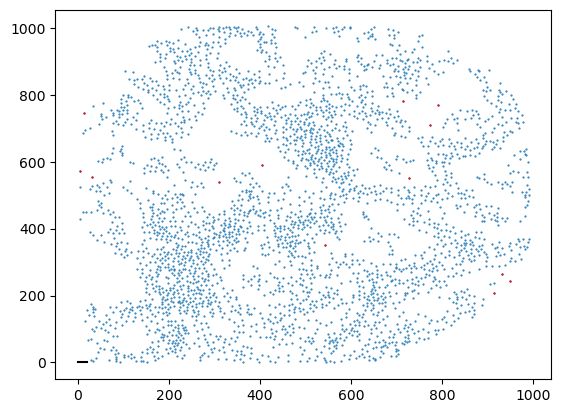

In [139]:
#Missing values during processing can be attributed to lonely cells that do not have neighbours.
# Shown here for patient D002_0
coords_miss = pretemp[pretemp['cellID'].isin(miss_nos)]
plt.scatter(pretemp['Location_Center_X'], pretemp['Location_Center_Y'], s=0.3)
plt.plot([0,20],[0,0], color='black')
plt.scatter(coords_miss['Location_Center_X'], coords_miss['Location_Center_Y'], s=0.3, color = 'red')
plt.show()

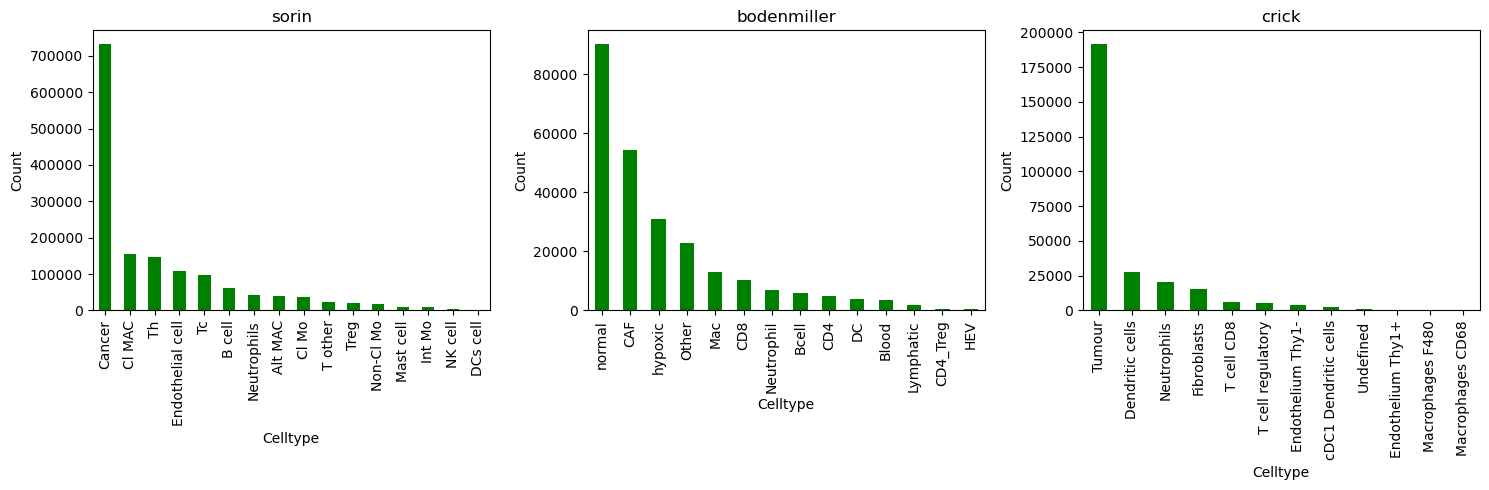

In [35]:
# Plot distribution of labels per dataset

# Create subplots
fig, axs = plt.subplots(1, len(dfs), figsize=(15, 5))

for i, df in enumerate(dfs):    
    # Calculate value counts
    value_counts = df['source_cluster'].value_counts()
    
    # Plot value counts as a bar plot
    value_counts.plot(kind='bar', ax=axs[i], color='green')
    
    # Set title and labels
    axs[i].set_title(f'{dfs_names[i]}')
    axs[i].set_xlabel('Celltype')
    axs[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [41]:
sorin['source_cluster'].value_counts()

source_cluster
Cancer              733534
Cl MAC              155630
Th                  147913
Endothelial cell    108324
Tc                   98349
B cell               62919
Neutrophils          42383
Alt MAC              39446
Cl Mo                37622
T other              23960
Treg                 19826
Non-Cl Mo            17012
Mast cell             9463
Int Mo                8327
NK cell               3684
DCs cell              1407
Name: count, dtype: int64

In [40]:
bodenmiller['source_cluster'].value_counts()

source_cluster
normal        90415
CAF           54259
hypoxic       31123
Other         22983
Mac           13044
CD8           10375
Neutrophil     6856
Bcell          5967
CD4            5056
DC             3914
Blood          3677
Lymphatic      1774
CD4_Treg        600
HEV             376
Name: count, dtype: int64

In [ ]:
# CT specific histogram
mat = []
for ct in cts:
    tempdf = total_counts_scid[total_counts_scid['source_cluster'] == ct]['total_scid']
    mat.append(tempdf)

labels = cts
plt.hist(mat, 61,
         histtype='bar',
         stacked=True,  
         fill=True,
         label=cts,
         alpha=0.8, # opacity of the bars
         color=colors,
         edgecolor = "k")

plt.xlabel('Neighbour count')
plt.ylabel('Count')
plt.title('Histogram of neighbour count per celltype')
plt.legend()
plt.savefig(f'{output_path}nb_count_histogram_per_ct.png', bbox_inches='tight')

plt.show()

In [47]:
sorin

,Patient_ID,source_ID,source_cluster,Alt MAC,B cell,Cancer,Cl MAC,Cl Mo,DCs cell,Endothelial cell,Int Mo,Mast cell,NK cell,Neutrophils,Non-Cl Mo,T other,Tc,Th,Treg
0,LUAD_D001,D001_0,Cancer,0.066667,0.0,0.333333,0.066667,0.0,0.0,0.000000,0.0,0.066667,0.0,0.000000,0.0,0.000000,0.200000,0.266667,0.0
1,LUAD_D001,D001_1,Tc,0.083333,0.0,0.666667,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.250000,0.0
2,LUAD_D001,D001_10,Th,0.000000,0.0,0.375000,0.187500,0.0,0.0,0.062500,0.0,0.125000,0.0,0.000000,0.0,0.000000,0.125000,0.125000,0.0
3,LUAD_D001,D001_100,Cancer,0.000000,0.0,0.500000,0.166667,0.0,0.0,0.333333,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
4,LUAD_D001,D001_1000,Treg,0.000000,0.0,0.000000,0.166667,0.0,0.0,0.166667,0.0,0.000000,0.0,0.083333,0.0,0.083333,0.250000,0.250000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1509794,LUAD_D416,D416_994,B cell,0.000000,0.0,0.166667,0.833333,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
1509795,LUAD_D416,D416_996,Cl MAC,0.000000,0.0,0.375000,0.375000,0.0,0.0,0.000000,0.0,0.125000,0.0,0.000000,0.0,0.000000,0.000000,0.125000,0.0
1509796,LUAD_D416,D416_997,Cancer,0.000000,0.0,0.000000,0.400000,0.2,0.0,0.200000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.2
1509797,LUAD_D416,D416_998,Cl MAC,0.000000,0.0,0.181818,0.363636,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.090909,0.363636,0.0
